# **SDGym - Synthetic Data Gym**

**Synthetic Data Gym** (SDGym) is a framework to benchmark the performance of synthetic data generators based on SDV and SDMetrics:

*   Learn a tabular model to synthesize rows in a table
*   Learn a relational data model to synthesize multiple, related tables
*   Learn a time-series model to synthesize new events

GitHub Link: https://github.com/sdv-dev/SDGym

A **Synthetic Data Generator** is a Python function (or method) that takes as input some data, which we call the real data, learns a model from it, and outputs new synthetic data that has the same structure and similar mathematical properties as the real one.

In [1]:
import os
import platform
OS = platform.system()   # Operating System                                                             # returns 'Windows', 'Linux', etc

# **Libraries Installation Section**

Installation of all required libraries: SDGym, gdown, pandas

In [2]:
os.system('pip install --upgrade --no-cache-dir gdown')
os.system('pip install sdgym')
os.system('pip install pandas')

0

# **All Imports**

In [ ]:
import timeit
import numpy as np
import pandas as pd
from sdv.demo import load_tabular_demo
from sdv.tabular import GaussianCopula, CTGAN, CopulaGAN
from sdv.evaluation import evaluate

# **All Globals**

In [ ]:
benchmark = False
gaussian_copula_synth_model = False
ctgan_synth_model = False
copula_gan_synth_model = True
dataset = 'telephony'   # satgpa, acs, telephony
model_names = []
limit_to_generate = 1000  # or None

# **All Settings**

In [ ]:
start_global_time = timeit.default_timer()
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500) 
if ctgan_synth_model == True and copula_gan_synth_model == True: # Only one Gan 
  ctgan_synth_model = False

# **All Functions Definitions**

In [ ]:
def explore_data(data): 
  print("\nHead of Data: \n", data.head())
  print("\nTail of Data: \n", data.tail())
  print("\nShape of Data: ", data.shape)
  print("\nInformation about Data: \n")
  try: 
    data.info()
  except: 
    pass
  print("\nTypes of Data attributes: \n")
  try: 
    data.dtypes
  except: 
    pass
  print("\nSummary of all numerical fields in the dataset: \n")
  try: 
    data.describe(include = [np.number])
  except: 
    pass
  print("\nSummary of all categorical fields in the dataset: \n")
  try: 
    data.describe(include = ['O'])
  except: 
    pass
  print("\nLoop Through Each Column and Check for nulls: \n")
  try: 
    for i in range(len(data.columns)):
        print(data.columns[i] + ": " + str(data[data.columns[i]].isna().sum()))
  except: 
    pass

def data_download(file_to_download, gdrive_code, OS, uncompress = True):
  if not os.path.exists(file_to_download):
    os.system('gdown --id "'+gdrive_code+'" --output '+file_to_download)
    if OS == "Linux" and uncompress:
        os.system('unzip -o -n "./'+file_to_download+'" -d "./"')
    return True
  else: 
    return None

# **Data Download - ACS, SatGPA, Telephony**

In [ ]:
if benchmark == True: 
  data = load_tabular_demo('student_placements')
  n_to_generate = data.shape[0]
else: 
  if dataset is 'satgpa':
    out = data_download("./satgpa.csv", "1NNVF1LhBDkW_KKp5_QW8cAiQDFatzWMy", OS, False)
    data = pd.read_csv('./satgpa.csv')
    data = data.drop(['sat_sum'], axis=1)
    data.to_csv('satgpa_no_sum.csv', sep=',')
    n_to_generate = data.shape[0]
  elif dataset is 'acs':
    out = data_download("./acs_dataset.zip", "1mKZfDieGBJP-cS-R7_i3zVKVawXThfUc", OS)
    if limit_to_generate is not None: 
      data = pd.read_csv('./acs_dataset.csv', nrows = limit_to_generate)
      n_to_generate = limit_to_generate
    else: 
      data = pd.read_csv('./acs_dataset.csv')
      n_to_generate = data.shape[0]
  elif dataset is 'telephony':
    out = data_download("./syntetic_telephony.zip", "1knlC9DQ-iQhxwpmd9qzFWSS0OcgI9-LA", OS)
    xl_file = pd.ExcelFile('./syntetic_telephony.xlsx')
    dfs = {sheet_name: xl_file.parse(sheet_name) for sheet_name in xl_file.sheet_names}
    data = dfs['Sheet1']
    n_to_generate = data.shape[0]

#**Data Types Conversions**

In [ ]:
data.COD_CELLA_CHIAMATA=data.COD_CELLA_CHIAMATA.astype("int64").astype("object")
data.DATA_CHIAMATA=pd.to_datetime(data.DATA_CHIAMATA, format='%Y%m%d')
data.CHIAVE_NUM_CHIAMANTE=data.CHIAVE_NUM_CHIAMANTE.astype("int64").astype("object")

data.ORA_MIN_CHIAMATA=data.ORA_MIN_CHIAMATA.astype("str").str.pad(width=6, side='left', fillchar='0')
data.ORA_MIN_CHIAMATA =pd.to_datetime(data.ORA_MIN_CHIAMATA , format='%H%M%S')


# **Exploratory Analysis**

In [ ]:
explore_data(data)


Head of Data: 
   CHIAVE_NUM_CHIAMANTE DATA_CHIAMATA    ORA_MIN_CHIAMATA COD_CELLA_CHIAMATA
0    14615194667453690    2017-01-22 1900-01-01 15:49:53                  0
1    14615194667453690    2017-01-29 1900-01-01 12:40:34                  1
2    14615194667453690    2017-01-29 1900-01-01 12:41:19                  1
3    14615194667453690    2017-01-22 1900-01-01 15:51:02                  1
4    14615194667453690    2017-01-22 1900-01-01 15:51:38                  1

Tail of Data: 
      CHIAVE_NUM_CHIAMANTE DATA_CHIAMATA    ORA_MIN_CHIAMATA COD_CELLA_CHIAMATA
9995    14615368752090240    2017-01-12 1900-01-01 12:09:10                272
9996    14615368752090240    2017-02-12 1900-01-01 18:26:01                272
9997     1508338528891430    2017-01-04 1900-01-01 09:26:27                272
9998    14615368752090240    2017-02-10 1900-01-01 15:11:58                272
9999    14615337422429130    2017-01-30 1900-01-01 09:09:03                272

Shape of Data:  (10000, 4)

Informa

# **Synthetic Data Generation via Gaussian Copula Method**

In mathematical terms, a copula is a distribution over the unit cube [0,1]d which is constructed from a multivariate normal distribution over Rd by using the probability integral transform. Intuitively, a copula is a mathematical function that allows us to describe the joint distribution of multiple random variables by analyzing the dependencies between their marginal distributions.

In [ ]:
if gaussian_copula_synth_model == True:
  model = GaussianCopula()
  model.fit(data)
  model_names.append(dataset+'_gaussian_copula.pkl')
  model.save(model_names[-1])

# **Synthetic Data Generation via Conditional GAN**

Modeling the probability distribution of rows in tabular data and generating realistic synthetic data is a non-trivial task. Tabular data usually contains a mix of discrete and continuous columns. Continuous columns may have multiple modes whereas discrete columns are sometimes imbalanced making the modeling difficult. Existing statistical and deep neural network models fail to properly model this type of data. We design TGAN, which uses a conditional generative adversarial network to address these challenges. To aid in a fair and thorough comparison, we design a benchmark with 7 simulated and 8 real datasets and several Bayesian network baselines. TGAN outperforms Bayesian methods on most of the real datasets whereas other deep learning methods could not.

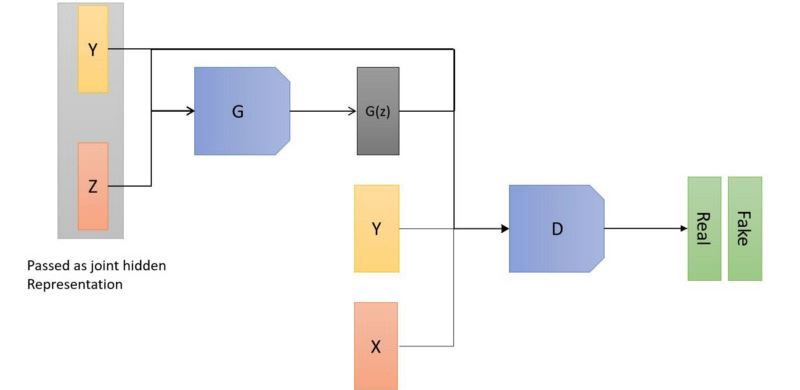

In [ ]:
if ctgan_synth_model == True:
  model = CTGAN(
    epochs=500,
    batch_size=100,
    generator_dim=(256, 256, 256),
    discriminator_dim=(256, 256, 256)
  )
  model.fit(data)
  model_names.append(dataset+'_ctgan.pkl')
  model.save(model_names[-1])

# **Synthetic Data Generation via Copula GAN**

The CopulaGAN model is a variation of the CTGAN Model which takes advantage of the CDF based transformation that the GaussianCopulas apply to make the underlying CTGAN model task of learning the data easier.




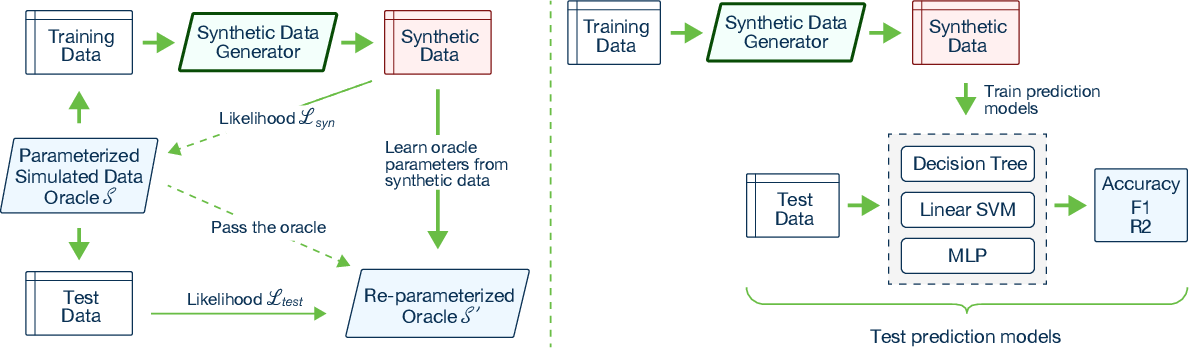

In [ ]:
if copula_gan_synth_model == True:
  model = CopulaGAN(
    epochs=500,
    batch_size=100,
    generator_dim=(256, 256, 256),
    discriminator_dim=(256, 256, 256)
  )
  model.fit(data)
  model_names.append(dataset+'_copulagan.pkl')
  model.save(model_names[-1])

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:5311: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: 

# **Model Loading and Preparation**

In [ ]:
model_file = []
model_to_load = []
if gaussian_copula_synth_model == True:
  model_file.append(model_names[0])
  model_to_load.append(("GaussianCopula", GaussianCopula))
if ctgan_synth_model == True:
  model_file.append(model_names[-1])
  model_to_load.append(("CTGAN", CTGAN))
elif copula_gan_synth_model == True:
  model_file.append(model_names[-1])
  model_to_load.append(("COPULAGAN", CopulaGAN))

loaded_model = []
for mf,ml in zip(model_file, model_to_load): 
  loaded_model.append((ml[0], ml[1].load(mf)))

# **Synthetic Data Generation**

In [ ]:
synthetic_data = []
for lm in loaded_model: 
  synthetic_data.append((lm[0], lm[1].sample(n_to_generate)))

# **Synthetic Data Exploratory Analysis**

In [ ]:
scored_and_synth_data = []
for sd in synthetic_data:
  try:
    print("\nMethod: ",sd[0])
    explore_data(sd[1])
    score = evaluate(sd[1], data)
    print("\n\nScore: ", score)
    scored_and_synth_data.append((sd[0], sd[1], score))  
  except:
    print("Error")



Method:  COPULAGAN

Head of Data: 
   CHIAVE_NUM_CHIAMANTE DATA_CHIAMATA    ORA_MIN_CHIAMATA COD_CELLA_CHIAMATA
0    14618618121214500    2017-02-11 1900-01-01 23:19:36                494
1    14612214548258718    2017-01-04 1900-01-01 09:43:12                  5
2    14613939628034646    2017-02-01 1900-01-01 13:09:31                610
3    14617711604703980    2017-01-25 1900-01-01 09:17:35                552
4    14616998409270150    2017-01-31 1900-01-01 23:50:02                393

Tail of Data: 
      CHIAVE_NUM_CHIAMANTE DATA_CHIAMATA    ORA_MIN_CHIAMATA COD_CELLA_CHIAMATA
9995    14615091744519116    2017-01-30 1900-01-01 15:28:58                 52
9996    14604436587624560    2017-01-23 1900-01-01 23:54:54                621
9997    14619957295726674    2017-02-01 1900-01-01 14:39:34                515
9998    14626004280401272    2017-01-24 1900-01-01 11:15:56                482
9999    14610621281470452    2017-02-01 1900-01-01 20:50:42                215

Shape of Data: 

Output streaming troncato alle ultime 5000 righe.
/usr/local/lib/python3.7/dist-packages/sdmetrics/utils.py:62: UserWarning: Unexpected value Pandas(CHIAVE_NUM_CHIAMANTE=14623509583208038, COD_CELLA_CHIAMATA=590) in synthetic data.
  warnings.warn(f'Unexpected value {value} in synthetic data.')
/usr/local/lib/python3.7/dist-packages/sdmetrics/utils.py:62: UserWarning: Unexpected value Pandas(CHIAVE_NUM_CHIAMANTE=14620415987486510, COD_CELLA_CHIAMATA=811) in synthetic data.
  warnings.warn(f'Unexpected value {value} in synthetic data.')
/usr/local/lib/python3.7/dist-packages/sdmetrics/utils.py:62: UserWarning: Unexpected value Pandas(CHIAVE_NUM_CHIAMANTE=14617531879614160, COD_CELLA_CHIAMATA=770) in synthetic data.
  warnings.warn(f'Unexpected value {value} in synthetic data.')
/usr/local/lib/python3.7/dist-packages/sdmetrics/utils.py:62: UserWarning: Unexpected value Pandas(CHIAVE_NUM_CHIAMANTE=14616438652454450, COD_CELLA_CHIAMATA=-2) in synthetic data.
  warnings.warn(f'Unexpected va



Score:  0.36995041425672953


In [ ]:
total_time = timeit.default_timer() - start_global_time

In [ ]:
for sas in scored_and_synth_data:
  sas[1].to_csv(dataset+'_synth_data_generated_by_method_'+sas[0].lower()+'total_time_'+str(round(total_time,2))+'_score_'+str(round(sas[2],3))+'.csv', sep=',')

In [ ]:
for sas in scored_and_synth_data:
  sas[1].to_excel(dataset+'_synth_data_generated_by_method_'+sas[0].lower()+'total_time_'+str(round(total_time,2))+'_score_'+str(round(sas[2],3))+'.xlsx')

In [ ]:
print("Global Exectution Time: ", total_time)

Global Exectution Time:  2706.173958313


In [ ]:
#import seaborn as sns

#sns.set_theme(style="whitegrid")


In [ ]:
import pandas as pd

In [ ]:
outputData=pd.read_excel("/content/telephony_synth_data_generated_by_method_copulagantotal_time_2706.17_score_0.37.xlsx")

<AxesSubplot:>

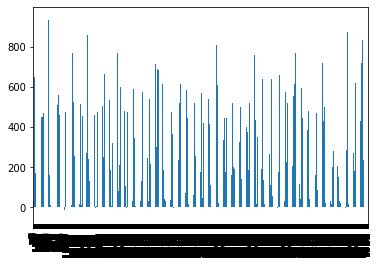

In [ ]:
outputData.COD_CELLA_CHIAMATA.plot.bar()

In [ ]:
import pandas as pd
pd.read_excel("")

In [ ]:
inputData=sas[1]
#inputData.COD_CELLA_CHIAMATA.value_counts()
pd.DataFrame(inputData).COD_CELLA_CHIAMATA.plot()#.bar()

ImportError: ignored

<Figure size 432x288 with 1 Axes>

In [ ]:
data.COD_CELLA_CHIAMATA.value_counts()

18     160
1      158
15     155
644    148
21     135
      ... 
435      1
723      1
724      1
725      1
501      1
Name: COD_CELLA_CHIAMATA, Length: 884, dtype: int64

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#pd.read_csv("/content/drive/MyDrive/fatture-01_05_2020-01_08_2020.csv",sep=";")